In [ ]:
#/content/drive/MyDrive/brain_tumor_dataset.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [2]:
!cp /content/drive/MyDrive/combined.zip /content/combined.zip

In [1]:
!unzip combined.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os

root_path = 'combined'
train_path = 'combined/Training'
test_path = 'combined/Testing'



def get_data(train_path, test_path):
   X = []
   Y = []
   X_test = []
   Y_test = []

   for class_names in os.listdir(train_path):
     class_path = train_path + '/' + class_names
     for image_name in os.listdir(class_path):
      try:
       image_path = class_path + '/' + image_name
       image = cv2.imread(image_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (64, 64))
       X.append(image)
       Y.append(class_names)
      except:
        pass

   for class_names in os.listdir(test_path):
     class_path = test_path + '/' + class_names
     for image_name in os.listdir(class_path):
      try:
       image_path = class_path + '/' + image_name
       image = cv2.imread(image_path)
       image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       image = cv2.resize(image, (64, 64))
       X_test.append(image)
       Y_test.append(class_names)
      except:
        pass
   return np.array(X), np.array(Y), np.array(X_test), np.array(Y_test)

X, Y, X_test, Y_test = get_data(train_path, test_path)





In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Y = le.fit_transform(Y)
Y_test = le.transform(Y_test)



In [6]:

X_scaled = X/255
X_test_scaled = X_test/255


In [7]:
model1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(64,64,3)),
        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(4,activation='softmax')

    ]
)


In [27]:
model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(64,64,3)),

        tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

       

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(4,activation='softmax')

    ]
)

In [28]:

model2.compile(

    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 63, 63, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 31, 31, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 933,492 (3.56 MB)

 Trainable params: 933,012 (3.56 MB)

 Non-trainable params: 480 (1.88 KB)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_scaled,Y,test_size=0.2)

In [31]:
history=model2.fit(X_train,Y_train,epochs=15,validation_data=(X_val,Y_val))

Epoch 1/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6714 - loss: 0.8685 - val_accuracy: 0.3566 - val_loss: 2.5653
Epoch 2/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8648 - loss: 0.3539 - val_accuracy: 0.7931 - val_loss: 0.5613
Epoch 3/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9144 - loss: 0.2386 - val_accuracy: 0.9075 - val_loss: 0.2555
Epoch 4/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9337 - loss: 0.1857 - val_accuracy: 0.9598 - val_loss: 0.1143
Epoch 5/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9491 - loss: 0.1360 - val_accuracy: 0.9607 - val_loss: 0.1132
Epoch 6/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9573 - loss: 0.1155 - val_accuracy: 0.9646 - val_loss: 0.1054
Epoch 7/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9650 - loss: 0.0981 - val_accuracy: 0.9184 - val_loss: 0.2473
Epoch 8/15
287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9697 - loss: 0.0844 - val_accu

In [21]:
model1.evaluate(X_test_scaled,Y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 7.5214      


[2.99174427986145, 0.8727965950965881]

In [19]:


from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = model2.predict(X_test_scaled)

y_pred = np.argmax(y_pred_prob, axis=1)

precision, recall, f1, support = precision_recall_fscore_support(Y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

precision, recall, f1, support = precision_recall_fscore_support(Y_test, y_pred)
for i in range(len(le.classes_)):
    print(f"Class: {le.classes_[i]}")
    print(f"  Precision: {precision[i]}")
    print(f"  Recall: {recall[i]}")
    print(f"  F1-score: {f1[i]}")
    print(f"  Support: {support[i]}")

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
import joblib
joblib.dump(le,'/content/drive/MyDrive/le.pkl')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/le.pkl'

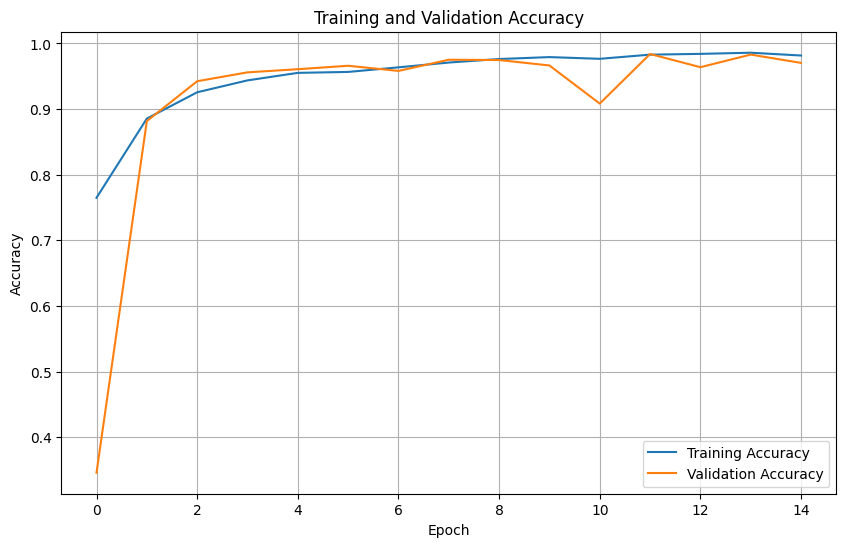

In [20]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model2.save('BrDX_model2.keras')


In [ ]:
le.inverse_transform([3])

array(['pituitary'], dtype='<U10')